Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
%matplotlib inline

/home/zlan/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

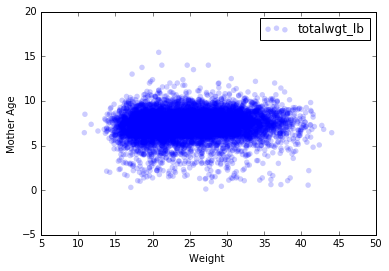

In [2]:
import nsfg
import thinkplot
import numpy as np
import thinkstats2


'''Scatter Plot of birth weight versus mother’s age'''
df = nsfg.ReadFemPreg()
df = df.dropna(subset=['totalwgt_lb','agepreg'])
thinkplot.Scatter(df.agepreg,df.totalwgt_lb)
thinkplot.Show(xlabel='Weight ',ylabel='Mother Age', alpha=0.2)



/home/zlan/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


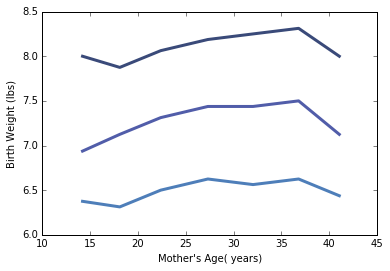

In [3]:
'''Percentiles of birth weight versus mother’s age'''
bins = np.arange(5, 50, 5)
indices = np.digitize(df.agepreg,bins)
groups = df.groupby(indices)
ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    thinkplot.Plot(ages, weights)

thinkplot.Show(xlabel="Mother's Age( years)",ylabel="Birth Weight (lbs)")

In [4]:
'''Parsons and Spearman correlations'''
print "Pearson's Correlation: ", thinkstats2.Corr(df.agepreg, df.totalwgt_lb)
print "Spearman's Rank: ", thinkstats2.SpearmanCorr(df.agepreg, df.totalwgt_lb)

Pearson's Correlation:  0.0688339703541
Spearman's Rank:  0.0946100410966


According to the Spearman's Rank values, the two variables have limited correlation. So we can say mother's age is a factor that contributes to child birth weight.